importing libraries and loading dataframe

In [3]:
import pandas as pd
import sys
import os
project_path = os.path.join("C:\\Users", "LUQMAAN", "OneDrive", "Documents", "gitprojects",
    "Marketing Funnel & Attribution Analysis",
    "marketing-analytics-performance-analyst")
sys.path.append(project_path)
from data import load_data
df = load_data()
df.head()

,user_id,timestamp,channel,conversion,conversion_value
0,user_18779,2023-02-08,Social Media,0,0
1,user_13494,2023-01-15,Organic Search,0,0
2,user_2532,2023-01-21,Paid Search,0,0
3,user_11317,2023-01-19,Organic Search,0,0
4,user_13927,2023-01-11,Paid Search,0,0


In [14]:
touchpoints = df.groupby('user_id').size().reset_index(name='touchpoints')
converted=df.groupby('user_id')['conversion'].max().reset_index(name='conversions')

user_funnel=pd.merge(touchpoints,converted,on='user_id')
user_funnel.head()

,user_id,touchpoints,conversions
0,user_1,3,1
1,user_10,4,0
2,user_100,1,0
3,user_1000,3,0
4,user_10000,5,0


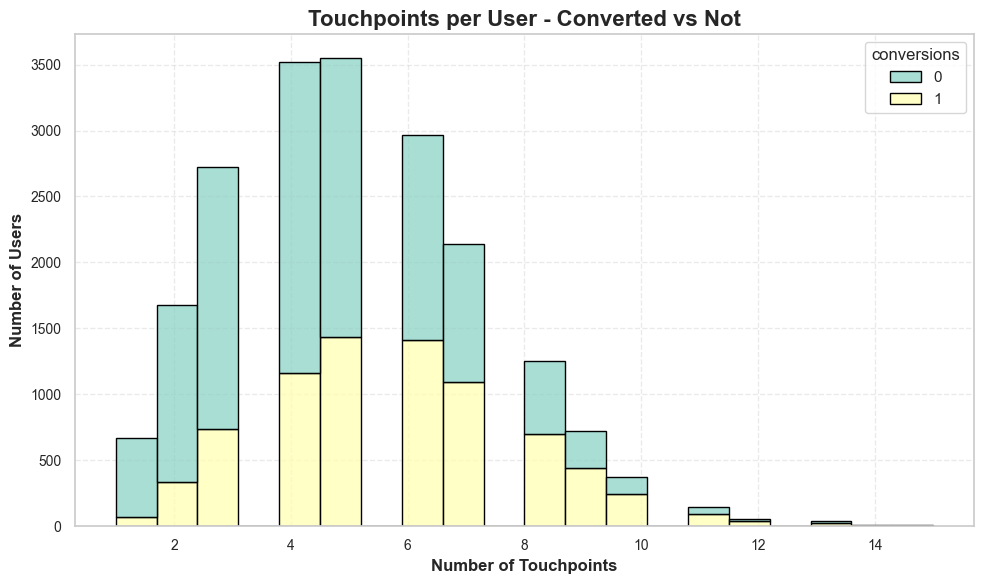

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
ax=sns.histplot(
    data=user_funnel,
    x='touchpoints',
    hue="conversions",
    bins=20,
    multiple="stack",
    palette="Set3",
    edgecolor="black"
)

plt.title("Touchpoints per User - Converted vs Not", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of Touchpoints", fontsize=12, fontweight = 'bold')
plt.ylabel("Number of Users", fontsize = 12, fontweight = 'bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha = 0.4)
plt. tight_layout()

plt.show()